In [1]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchvision import datasets, transforms
import torch.optim as optim
from tensorboardX import SummaryWriter
from torch.optim import lr_scheduler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

import numpy as np
from PIL import Image
import json
import os
from collections import OrderedDict
from VAE import VAE, loss_function, validation, save_im, train_vae

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "car_dam/data2a/"

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.Resize(96),
                                       transforms.CenterCrop(96),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(96),
                                      transforms.CenterCrop(96),
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(data_dir + 'training', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + 'validation', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=128)

unloader = transforms.ToPILImage()

In [3]:
ngf = 64
ndf = 64
nc = 3
nz = 100
model = VAE(ngf, ndf, nc, nz, have_cuda=True)
model = model.cuda()

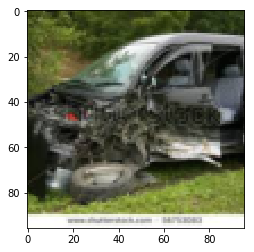

In [4]:
img = unloader(iter(testloader).next()[0][0])
_ = plt.imshow(img)

In [5]:
image_save_directory = "VAE_IMAGES/"
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 150
print_every = 15

train_vae(model, optimizer, print_every, num_epochs)

TypeError: train_vae() missing 2 required positional arguments: 'trainloader' and 'testloader'

In [8]:
img, _ = iter(testloader).next()
save_im(img, title='test_output', directory='pictures/')